<a href="https://colab.research.google.com/github/robinmkc/Coursera_Capstone/blob/main/data_scientist_capstone_week4_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

San Francisco House Price vs Venues near by

In the past few years, the housing price is booming in many US cities. There are many reason which is causing the housing price to increase, but the objective of this study is to find out the house price difference between different zipcodes in the same city. The audience of this study is any potential home buyer. They may want to find out if any good bargin in a particular zipcode if that zipcode still has low price with good venus near by.

This study will use the housing price per square feet for different zipcodes in San Francisco and compare with top venues in zipcode.
Week4 Part1

The followings are the steps for week4 part 1 project:

    use BeautifulSoup to get the zipcode and neighborhood name from the web.
    use geolocator.geocode to get latitude and longitude for each zipcode.
    use folium.Map to create a San Francisco map with blue dot for 20 zipcodes.


The followings are the steps for week4 part 2 project:

    use Foursquare api to get the top venues from all 20 zipcodes within 500 meters of each zipcode geolocation.
    use Kmean Cluster machine learning to group the zipcodes with top venues into different cluster.
    use folium.Map to create a San Francisco map and zipcodes with different color for different cluster.  


# This is Part 1 of Week 4 Project

In [ ]:
Install Beautifulsoup (bs4)

In [ ]:
!pip install bs4

Import pandas, requests, and BeautifulSoup

In [ ]:
import pandas as pd 
import requests 
from bs4 import BeautifulSoup 


Create Data Frame for San Francisco Zip code with Neighborhood and Population Info

In [ ]:

url = 'http://www.healthysf.org/bdi/outcomes/zipmap.htm'
req = requests.get(url) 
soup = BeautifulSoup(req.content, 'html.parser')
data = []
table = soup.find_all('table')[3]
#print(table)
table_body = table.find('tbody')
print(table_body)

rows = table.find_all('tr')

for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if(isinstance(cols, list) and len(cols) > 2):
        #Check if Borough is not assigned
        if('Zip' in cols[0] or '94110' in cols[0]):
            #Borough is not assigned.
            #Skip appending
            pass
        else:
            #Keep row if Borough is assigned.
            #If a cell has a borough but a Not assigned neighborhood, 
            #then the neighborhood will be the same as the borough.

            cols[1] = cols[1].split(r'/')[0]
            cols[1] = cols[1].split(r'-')[0]
            data.append([ele for ele in cols if ele]) # Get rid of empty values

sf_df=pd.DataFrame(data)
sf_df.columns =['PostalCode', 'Neighborhood', 'Population']

sf_df['Neighborhood']=sf_df['Neighborhood'].str.replace(r'\n', r'')
sf_df['Population']=sf_df['Population'].str.replace(r',', r'')
"""

#df.columns =['PostalCode', 'Borough', 'Neighborhood']
df['Borough']=df['Borough'].replace({'Downtown sfStn A PO Boxes25 The Esplanade':'Downtown sf Stn A',
                                             'East sfBusiness reply mail Processing Centre969 Eastern':'East sf Business',
                                             'EtobicokeNorthwest':'Etobicoke Northwest','East YorkEast sf':'East York/East sf',
                                             'MississaugaCanada Post Gateway Processing Centre':'Mississauga'})

"""
sf_df

None


,PostalCode,Neighborhood,Population
0,94102,Hayes Valley,28991
1,94103,South of Market,23016
2,94107,Potrero Hill,17368
3,94108,Chinatown,13716
4,94109,Polk,56322
5,94112,Ingelside,73104
6,94114,Castro,30574
7,94115,Western Addition,33115
8,94116,Parkside,42958
9,94117,Haight,38738


From table_contents, find table and convert data to pandas dataframe base on the requirements

Read number of rows and columns from dataframe

In [ ]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import time

print('Libraries imported.')

Libraries imported.


In [ ]:
address = 'San Francisco, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.419906.


In [ ]:
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
def get_location_latitude(row):
    for i in range(3):
        try:
            PostalCode = row['PostalCode']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode("CA " + PostalCode)
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return latitude
        except:
            Neighborhood = row['Neighborhood']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(Neighborhood + ", San Francisco")
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return latitude
def get_location_longitude(row):

    for i in range(3):
        try:
            PostalCode = row['PostalCode']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode("CA " + PostalCode)
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return longitude
        except:
            Neighborhood = row['Neighborhood']
            geolocator = Nominatim(user_agent="ny_explorer")
            location = geolocator.geocode(Neighborhood + ", San Francisco")
            #print(row['PostalCode'], row['Neighborhood'])
            latitude = location.latitude
            longitude = location.longitude
            #print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))
            return longitude

sf_df['Latitude'] = sf_df.apply(get_location_latitude, axis=1)
sf_df['Longitude'] = sf_df.apply(get_location_longitude, axis=1)
# clean columns
#nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

sf_df.head(22)


,PostalCode,Neighborhood,Population,Latitude,Longitude
0,94102,Hayes Valley,28991,37.786661,-122.408450
1,94103,South of Market,23016,37.774483,-122.411044
2,94107,Potrero Hill,17368,37.789529,-122.406086
3,94108,Chinatown,13716,37.791091,-122.406587
4,94109,Polk,56322,37.793867,-122.420471
5,94112,Ingelside,73104,37.722877,-122.445160
6,94114,Castro,30574,37.761495,-122.436666
7,94115,Western Addition,33115,37.784410,-122.435644
8,94116,Parkside,42958,37.746330,-122.473219
9,94117,Haight,38738,37.776998,-122.431240


In [ ]:
# create map of New York using latitude and longitude values
sf_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, PostalCode, neighborhood in zip(sf_df['Latitude'], sf_df['Longitude'], sf_df['PostalCode'], sf_df['Neighborhood']):
    print(PostalCode, neighborhood, lat, lng)
    label = '{}, {}'.format(neighborhood, PostalCode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(sf_map)  

sf_map

94102 Hayes               Valley 37.7866611 -122.40844963443767
94103 South               of Market 37.774482682084866 -122.41104374562194
94107 Potrero               Hill 37.78952862758635 -122.4060862325324
94108 Chinatown 37.79109140511726 -122.40658733533844
94109 Polk 37.793866999676275 -122.42047103982021
94112 Ingelside 37.722877497444586 -122.4451601817335
94114 Castro 37.76149452092264 -122.43666599783904
94115 Western               Addition 37.78441041175344 -122.43564417808464
94116 Parkside 37.74633036752839 -122.47321929282748
94117 Haight 37.7769975 -122.4312396041318
94118 Inner               Richmond 37.7787208 -122.45508535902061
94121 Outer               Richmond 37.77855176507084 -122.49227982208976
94122 Sunset 37.761046477964825 -122.4720238204484
94123 Marina 37.798967238491294 -122.43022551862445
94124 Bayview 37.745719598780454 -122.39547461815316
94127 St.               Francis Wood 37.739607482336936 -122.46528435763148
94131 Twin               Peaks 37.75464 

Visualing San Francisco with different zipcodes on the map.   We are done with part 1 of week 4.
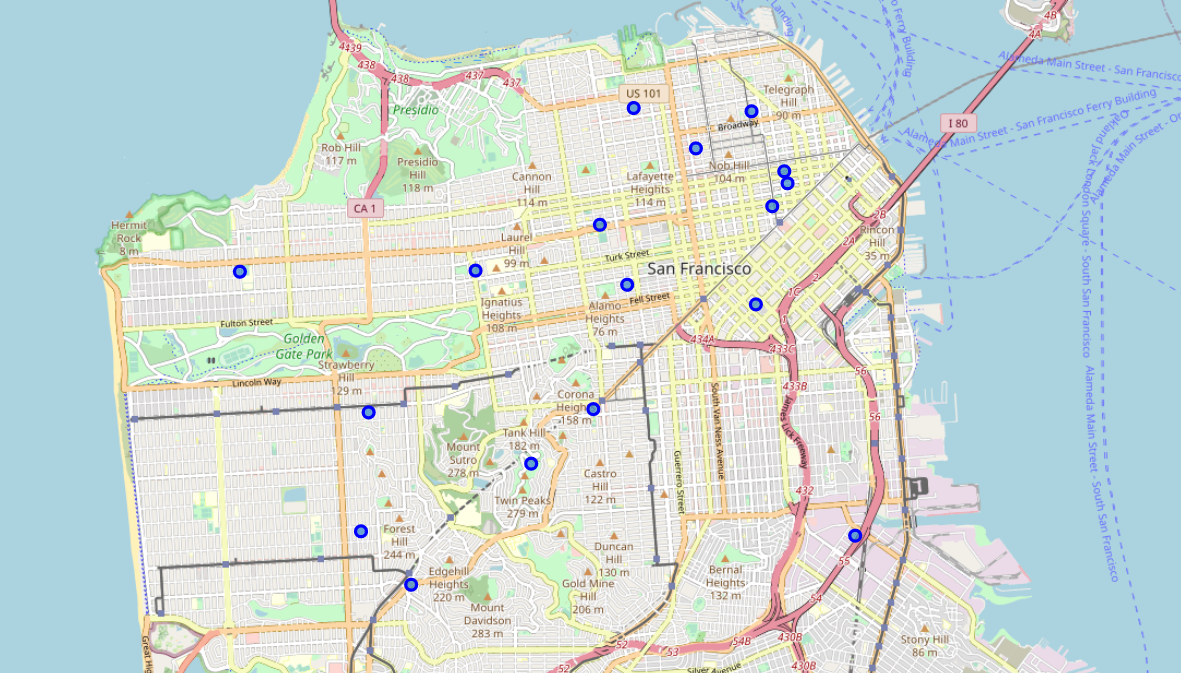

# This is Part 2 of Week 4 project



Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'TEEZ1B2SQPVUVYJMHJG4GSIHM5OZ5XCQKPRIV42Y3OXT3T3T' # your Foursquare ID
CLIENT_SECRET = 'R12H02DVQC5UNWISV2TWZ5HSRBLDIMXK4D0NYT2GVHM2AQ05' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TEEZ1B2SQPVUVYJMHJG4GSIHM5OZ5XCQKPRIV42Y3OXT3T3T
CLIENT_SECRET:R12H02DVQC5UNWISV2TWZ5HSRBLDIMXK4D0NYT2GVHM2AQ05


Get the neighborhood's name.

function that extracts the category of the venue

Explore Neighborhoods in sf



In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

sf_venues = getNearbyVenues(names=sf_df['Neighborhood'],
                                   latitudes=sf_df['Latitude'],
                                   longitudes=sf_df['Longitude']
                                  )


Hayes               Valley
South               of Market
Potrero               Hill
Chinatown
Polk
Ingelside
Castro
Western               Addition
Parkside
Haight
Inner               Richmond
Outer               Richmond
Sunset
Marina
Bayview
St.               Francis Wood
Twin               Peaks
Lake               Merced
North               Beach
Visitacion               Valley


Let's check the size of the resulting dataframe

In [ ]:
sf_venues.shape
sf_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley,37.786661,-122.40845,Black Sugar,37.786135,-122.409948,Bubble Tea Shop
1,Hayes Valley,37.786661,-122.40845,Williams-Sonoma,37.788377,-122.407446,Kitchen Supply Store
2,Hayes Valley,37.786661,-122.40845,Benjamin Cooper,37.787396,-122.409847,Cocktail Bar
3,Hayes Valley,37.786661,-122.40845,Union Square,37.787933,-122.407501,Pedestrian Plaza
4,Hayes Valley,37.786661,-122.40845,Tiffany & Co.,37.788598,-122.407708,Jewelry Store


Let's check how many venues were returned for each neighborhood

In [ ]:
sf_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bayview,8,8,8,8,8,8
Castro,96,96,96,96,96,96
Chinatown,93,93,93,93,93,93
Haight,27,27,27,27,27,27
Hayes Valley,100,100,100,100,100,100
Ingelside,13,13,13,13,13,13
Inner Richmond,49,49,49,49,49,49
Lake Merced,58,58,58,58,58,58
Marina,66,66,66,66,66,66


Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(sf_venues['Venue Category'].unique())))

There are 243 uniques categories.


Analyze Each Neighborhood

In [ ]:
# one hot encoding
sf_onehot = pd.get_dummies(sf_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sf_onehot['Neighborhood'] = sf_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sf_onehot.columns[-1]] + list(sf_onehot.columns[:-1])
sf_onehot = sf_onehot[fixed_columns]

sf_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Bike Shop,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Field,Filipino Restaurant,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Reservoir,Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Hayes Valley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley,0,0,0,0,0,0,0,0,0,0,0,

In [ ]:
sf_onehot.shape

(1169, 244)

Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
sf_grouped = sf_onehot.groupby('Neighborhood').mean().reset_index()
sf_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bed & Breakfast,Beer Bar,Bike Shop,Bookstore,Boutique,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Cable Car,Café,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,College Gym,Comic Shop,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Dumpling Restaurant,Electronics Store,English Restaurant,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Field,Filipino Restaurant,Flower Shop,Food,Food Court,Food Truck,Fountain,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Health & Beauty Service,Hill,Historic Site,History Museum,Hobby Shop,Home Service,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Marijuana Dispensary,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Movie Theater,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Noodle House,North Indian Restaurant,Optical Shop,Other Nightlife,Outdoor Sculpture,Pakistani Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Pet Store,Pharmacy,Photography Lab,Physical Therapist,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Reservoir,Restaurant,Rock Club,Roller Rink,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Spa,Speakeasy,Spiritual Center,Sporting Goods Shop,Sports Bar,Steakhouse,Supermarket,Supplement Shop,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Trattoria/Osteria,Udon Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Wagashi Place,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Bayview,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.

In [ ]:
sf_grouped.shape

(20, 244)

In [ ]:
num_top_venues = 5

for hood in sf_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sf_grouped[sf_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview----
                  venue  freq
0        Clothing Store  0.12
1             Nightclub  0.12
2             Wine Shop  0.12
3                  Café  0.12
4  Kitchen Supply Store  0.12


----Castro----
             venue  freq
0          Gay Bar  0.09
1  Thai Restaurant  0.04
2      Coffee Shop  0.04
3             Park  0.03
4   Cosmetics Shop  0.03


----Chinatown----
           venue  freq
0          Hotel  0.08
1    Coffee Shop  0.05
2       Boutique  0.05
3       Tea Room  0.03
4  Jewelry Store  0.03


----Haight----
              venue  freq
0              Park  0.11
1      Liquor Store  0.07
2  Spiritual Center  0.04
3   Coworking Space  0.04
4               Spa  0.04


----Hayes               Valley----
              venue  freq
0          Boutique  0.06
1             Hotel  0.05
2     Women's Store  0.04
3  Department Store  0.03
4    Clothing Store  0.03


----Ingelside----
          venue  freq
0   Bus Station  0.15
1      Bus Line  0.08
2     BBQ Joint  0.08
3  De

put that into a pandas dataframe

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.*italicized text*

In [ ]:
import numpy as np # library to handle data in a vectorized manner
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sf_grouped['Neighborhood']

for ind in np.arange(sf_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sf_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(20)

neighborhoods_venues_sorted.sort_values(by=['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue']).head(20)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Polk,Bar,Grocery Store,Italian Restaurant,Gym / Fitness Center,Coffee Shop,Bakery,Vietnamese Restaurant,American Restaurant,Pet Store,Deli / Bodega
4,Hayes Valley,Boutique,Hotel,Women's Store,Speakeasy,Furniture / Home Store,Spa,Gym / Fitness Center,Coffee Shop,Cocktail Bar,Clothing Store
5,Ingelside,Bus Station,Asian Restaurant,Metro Station,Food Truck,Flower Shop,Tennis Court,Bus Line,BBQ Joint,College Gym,Dessert Shop
11,Parkside,Chinese Restaurant,Martial Arts School,Gas Station,Dessert Shop,Korean Restaurant,Szechuan Restaurant,Light Rail Station,Sushi Restaurant,Liquor Store,Bubble Tea Shop
0,Bayview,Clothing Store,Food,Sandwich Place,Kitchen Supply Store,Nightclub,Brazilian Restaurant,Café,Wine Shop,Food Court,Food Truck
16,Sunset,Coffee Shop,Chinese Restaurant,Yoga Studio,Bakery,Hotpot Restaurant,Japanese Restaurant,Grocery Store,Liquor Store,Massage Studio,Dumpling Restaurant
15,St. Francis Wood,Coffee Shop,Pub,Burger Joint,Gym / Fitness Center,Wine Bar,Italian Restaurant,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant
6,Inner Richmond,Coffee Shop,Sushi Restaurant,Mobile Phone Shop,Café,Chinese Restaurant,Bank,Japanese Restaurant,Thai Restaurant,Burger Joint,Bus Station
18,Visitacion Valley,Garden,Vietnamese Restaurant,Cantonese Restaurant,Trail,Park,Food Truck,Food Court,Fountain,Food,Ethiopian Restaurant
1,Castro,Gay Bar,Thai Restaurant,Coffee Shop,Park,Cosmetics Shop,New American Restaurant,Indian Restaurant,Trail,Yoga Studio,Mediterranean Restaurant


Run k-means to cluster the neighborhood into 5 clusters.

In [ ]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

sf_grouped_clustering = sf_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sf_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0],
      dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [ ]:
# add clustering labels
try:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
except:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis='columns', inplace=True)
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
    
sf_merged = sf_df

# merge sf_grouped with sf_df to add latitude/longitude for each neighborhood
sf_merged = sf_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
sf_merged = sf_merged.fillna(0)
sf_merged.sort_values(by=['Cluster Labels'], ascending=False).head(20)


,PostalCode,Neighborhood,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,94124,Bayview,33170,37.745720,-122.395475,4,Clothing Store,Food,Sandwich Place,Kitchen Supply Store,Nightclub,Brazilian Restaurant,Café,Wine Shop,Food Court,Food Truck
5,94112,Ingelside,73104,37.722877,-122.445160,3,Bus Station,Asian Restaurant,Metro Station,Food Truck,Flower Shop,Tennis Court,Bus Line,BBQ Joint,College Gym,Dessert Shop
16,94131,Twin Peaks,27897,37.754640,-122.446480,2,Trail,Scenic Lookout,Tailor Shop,Bus Station,Bus Stop,Hill,Reservoir,Eye Doctor,Farmers Market,Field
19,94134,Visitacion Valley,40134,37.714948,-122.409713,1,Garden,Vietnamese Restaurant,Cantonese Restaurant,Trail,Park,Food Truck,Food Court,Fountain,Food,Ethiopian Restaurant
11,94121,Outer Richmond,42473,37.778552,-122.492280,0,Pizza Place,Café,Chinese Restaurant,Bus Station,Sandwich Place,Grocery Store,Mediterranean Restaurant,Burrito Place,Bus Stop,Seafood Restaurant
18,94133,North Beach,26827,37.798522,-122.411725,0,Italian Restaurant,Bakery,Pizza Place,Coffee Shop,Café,Chinese Restaurant,Park,Cocktail Bar,Yoga Studio,Seafood Restaurant
17,94132,Lake Merced,26291,37.724962,-122.480318,0,Pizza Place,Cosmetics Shop,Juice Bar,Bakery,Food Truck,Coffee Shop,Clothing Store,Mobile Phone Shop,Sandwich Place,Mexican Restaurant
15,94127,St. Francis Wood,20624,37.739607,-122.465284,0,Coffee Shop,Pub,Burger Joint,Gym / Fitness Center,Wine Bar,Italian Restaurant,Pizza Place,Park,Chinese Restaurant,Mexican Restaurant
13,94123,Marina,22903,37.798967,-122.430226,0,Spa,Cosmetics Shop,Yoga Studio,Italian Restaurant,Park,Mexican Restaurant,Sushi Restaurant,Steakhouse,Bar,Health & Beauty Service
12,94122,Sunset,55492,37.761046,-122.472024,0,Coffee Shop,Chinese Restaurant,Yoga Studio,Bakery,Hotpot Restaurant,Japanese Restaurant,Grocery Store,Liquor Store,Massage Studio,Dumpling Restaurant


Finally, let's visualize the resulting clusters

In [ ]:

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map 
markers_colors = []
for postalcode, lat, lon, poi, cluster in zip(sf_merged['PostalCode'], sf_merged['Latitude'], sf_merged['Longitude'], sf_merged['Neighborhood'], sf_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + '\n' + postalcode + '\n' + ' Cluster ' + str(cluster), parse_html=True)
    if cluster is not np.NaN:
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[int(cluster)-1],
            fill=True,
            fill_color=rainbow[int(cluster)-1],
            fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

This is the San Francisco map with different zipcode with different color (clusters)
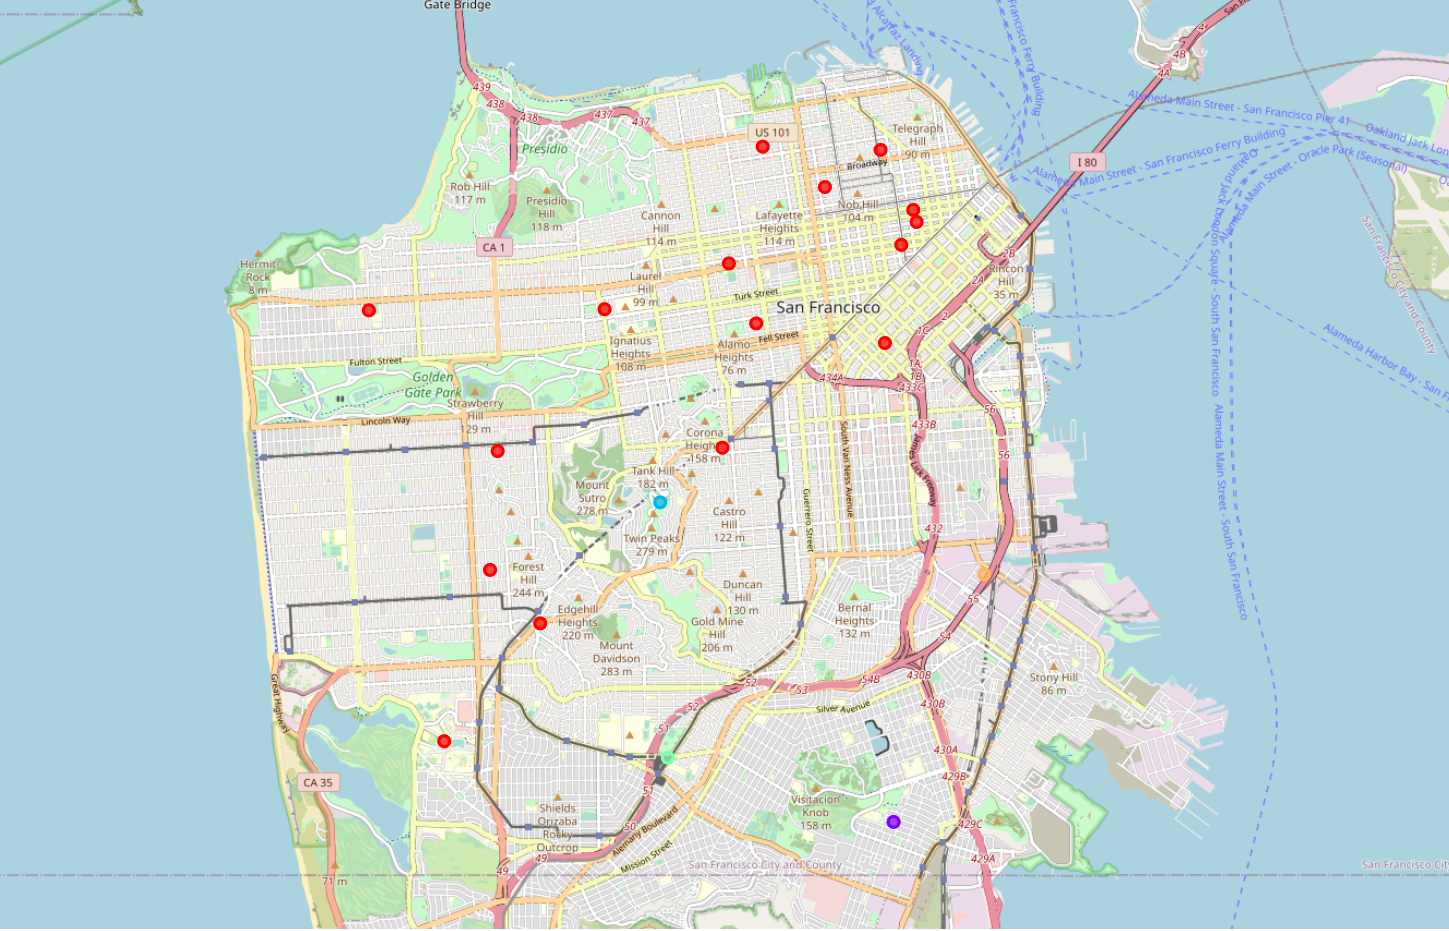

Now, the machine learning Kmean cluster grouping is ready.    We will get another data set for San Francisco house pricing at the final report for comparison.